# 사이킷런 버전 확인

In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


# 붓꽃 품종 분류

## 데이터 로드

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #의사 결정 나무 분류기
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [4]:
iris = load_iris()
iris #딕셔너리로 값들이 담겨있음을 확인
iris.keys() #keys() 딕셔너리 메소드를 사용해 key값들만 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris.data) #입력데이터

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
print(iris.target) #정답 데이터

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


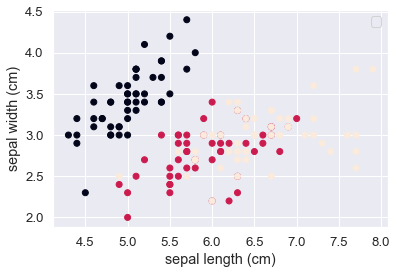

In [60]:
import matplotlib.pyplot as plt

#sepal length와 sepal width만 선택
X = iris.data[:, :2] #꽃받침 길이와 꽃받침 폭 데이터를 X변수에 할당
y = iris.target #꽃의 품종을 나타내는 레이블 데이터를 y변수에 할당

# print(X[:, 0]) # 꽃받침 길이
# print(X[:, 1]) # 꽃받침 폭

plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

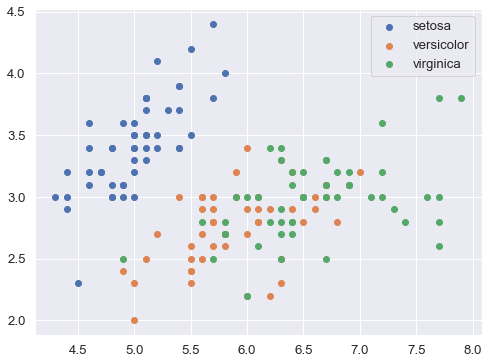

In [59]:
X = iris.data[:, :2]
y = iris.target

#품종 이름 리스트
names = iris.target_names
plt.figure(figsize = (8, 6))
for i in range(len(names)):
    plt.scatter(X[y == i, 0], X[y==i, 1], label=names[i])
    
#범례추가
plt.legend()

plt.show()

In [12]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris_data = iris.data
print(iris_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
# iris.target는 붓꽃 데이터 셋에서 레이블 데이터를 numpy를 가지고 잇다
iris_label = iris.target
print(type(iris_label)) #numpy.ndarray
print(iris_label.shape) #shape 개수
iris_label #정답레이블

<class 'numpy.ndarray'>
(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
print(f"iris target 명 : {iris.target_names}")
#target : 분류 시 레이블 값, 회귀 시 숫자 결과값 데이터 셋
#target_names : 개별 레이블 이름

iris target 명 : ['setosa' 'versicolor' 'virginica']


In [24]:
#붓꽃 데이터를 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names) #feature_names : 피처의이름
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [26]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
#결측값 확인
iris_df.isnull() #결측값인 경우 NULL True, 정상데이터면 False
iris_df.isnull().sum() #각 열의 결측값 개수를 계산
#유효값이기 때문에 결측값이 없음을 확인

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [33]:
#중복데이터 확인
iris_df.duplicated() #동일한 샘플이 중복되어 존재하는지 여부 중복되면 True, 아니면 Fasle
iris_df.duplicated().sum()

1

In [36]:
#실제 어느 행에 데이터가 중복인지 확인
iris_df.loc[iris_df.duplicated(), :]
#142행의 데이터가 중복됨

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
142,5.8,2.7,5.1,1.9,2


In [39]:
#컬럼명 수정
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', "petal_width", "label"]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
#어떤 데이터 행끼리 중복인지 확인
iris_df.loc[(iris_df.sepal_length == 5.8) & (iris_df.petal_length==5.1), :]

,sepal_length,sepal_width,petal_length,petal_width,label
101,5.8,2.7,5.1,1.9,2
114,5.8,2.8,5.1,2.4,2
142,5.8,2.7,5.1,1.9,2


In [49]:
#중복 데이터 제거
iris_df = iris_df.drop_duplicates()
iris_df.loc[(iris_df.sepal_length == 5.8) & (iris_df.petal_width==2.4), :]

,sepal_length,sepal_width,petal_length,petal_width,label
114,5.8,2.8,5.1,2.4,2


In [50]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
iris_df.corr() #상관관계를 계산하는 함수 (-1~1사이의 값)

,sepal_length,sepal_width,petal_length,petal_width,label
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
label,0.786971,-0.422987,0.949402,0.956514,1.000000


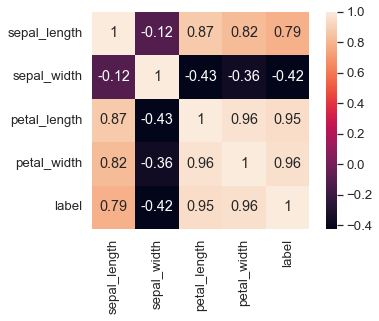

In [56]:
#데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)

#상관계수 히트맵
sns.heatmap(data = df.corr(), square = True, annot = True, cbar = True)
plt.show()

In [57]:
#label 값의 분포
iris_df['label'].value_counts()

0    50
1    50
2    49
Name: label, dtype: int64

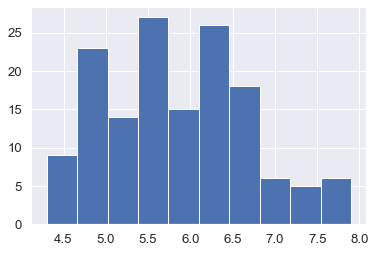

In [61]:
plt.hist(data = iris_df, x = 'sepal_length')
plt.show()

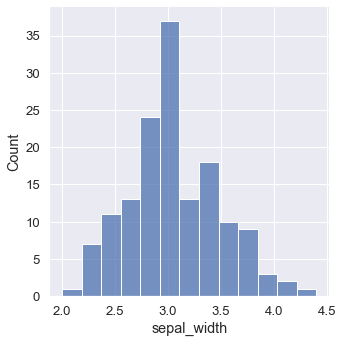

In [62]:
sns.displot(data = iris_df, x = "sepal_width", kind = 'hist')
plt.show()

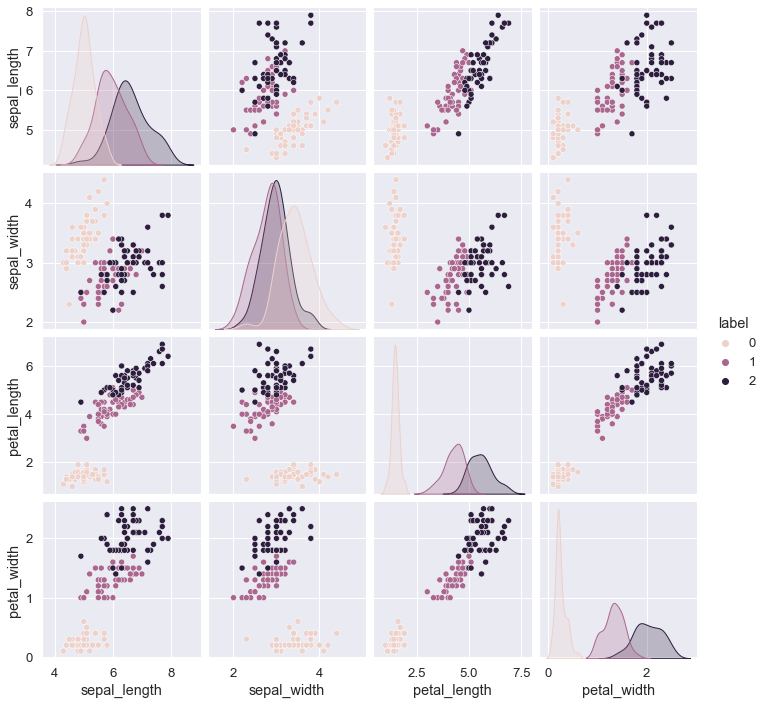

In [63]:
sns.pairplot(iris_df, hue = 'label', height = 2.5, diag_kind = "kde")
#kde : 커널 밀도 추정 그래프
plt.show()

# Train_Test 데이터 셋 분할

In [64]:
X_data = iris_df.loc[:, 'sepal_length':'petal_width']
y_data = iris_df.loc[:, 'label']

#학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2,
                                                   shuffle = True, random_state = 20)
#학습데이터셋
print(X_train.shape, y_train.shape)
#테스트 데이터 셋
print(X_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


In [67]:
y_train, y_test

(95     1
 88     1
 0      0
 46     0
 11     0
       ..
 22     0
 75     1
 137    2
 15     0
 99     1
 Name: label, Length: 119, dtype: int32,
 47     0
 73     1
 74     1
 128    2
 67     1
 89     1
 143    2
 21     0
 108    2
 12     0
 136    2
 76     1
 119    2
 35     0
 28     0
 121    2
 13     0
 58     1
 114    2
 57     1
 50     1
 149    2
 111    2
 20     0
 72     1
 81     1
 98     1
 34     0
 104    2
 130    2
 Name: label, dtype: int32)

In [68]:
#비율확인
print(np.unique(y_train, return_counts = True)) #훈련데이터의 클래스 레이블 분포 확인
print(np.unique(y_test, return_counts = True)) #테스트데이터의 클래스 레이블 분포 확인

(array([0, 1, 2]), array([42, 39, 38], dtype=int64))
(array([0, 1, 2]), array([ 8, 11, 11], dtype=int64))


In [69]:
#train_test_split stratify 파일 = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2,
                                                   stratify = iris.target, random_state = 7)
#stratify = iris.target 클래스 비율을 유지하기 위한 옵션

#데이터를 훈련 세트와 테스트 세트로 나눌때 random_state  데이터를 나누는 난수 생성과정이 재현가능함
#항상 같은 방식으로 데이터가 섞이고 나누어지게됨
#항상 같은 조건에서 동일한 실험을 재현할 수 있음

In [71]:
#비율확인
print(np.unique(y_train, return_counts = True)) #훈련데이터의 클래스 레이블 분포 확인
print(np.unique(y_test, return_counts = True)) #테스트데이터의 클래스 레이블 분포 확인
y_train, y_test

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))
(array([0, 1, 2]), array([10, 10, 10], dtype=int64))


(array([2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1,
        0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1,
        0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2,
        0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2,
        0, 1, 2, 1, 2, 0, 0, 2, 1, 0]),
 array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
        1, 0, 2, 2, 2, 1, 0, 2]))

In [73]:
#모델생성
decision_tree = DecisionTreeClassifier(random_state = 32)
print(decision_tree)

#알고리즘 모델 초기화시 사용 random_state
# 무작위성을 제어하기 위해서 모델을 생성할 때 설정하고 동일한 하이퍼파라미터와 데이터에 대해
# 항상 같은 모델이 생성됨

DecisionTreeClassifier(random_state=32)


In [74]:
#모델학습
decision_tree.fit(X_train, y_train)
#X_train, y_train으로 모델 학습
#X_train : 학습 데이터 특성(꽃받침 길이와 폭)
#y_train : 학습 데이터의 레이블(품종)

DecisionTreeClassifier(random_state=32)

In [76]:
y_pred = decision_tree.predict(X_test)
y_pred
#X_test는 테스트 데이터의 특성(꽃받침 길이와 폭)
#학습된 테스트 데이터의 예측값을 나타냄
#y_pred는 예측된 품종 레이블 저장됨

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 2])

In [77]:
y_test
#정답레이블

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

In [78]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 : {accuracy}")

정확도 : 0.9333333333333333
